In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import sys

In [81]:
df = pd.read_csv('./TSLA.CSV')

In [82]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [83]:
stock_data = df[['Date', 'Close']]

In [84]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [85]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [86]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [87]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [88]:
stock_data.set_index('Date', inplace=True)

# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [89]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


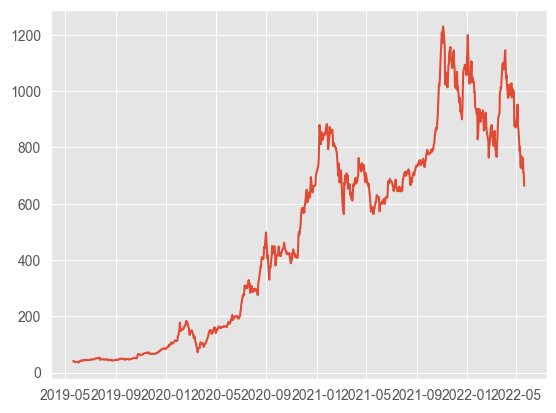

In [90]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

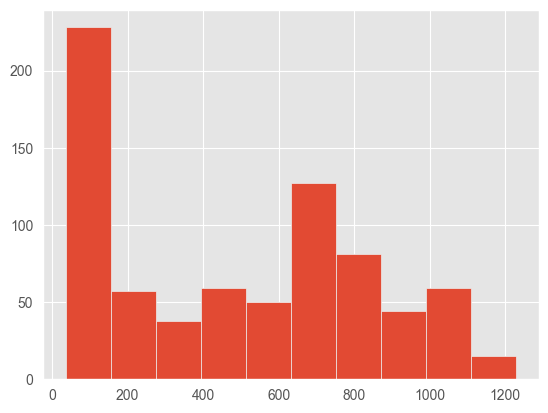

In [91]:
plt.hist(stock_data['Close'])

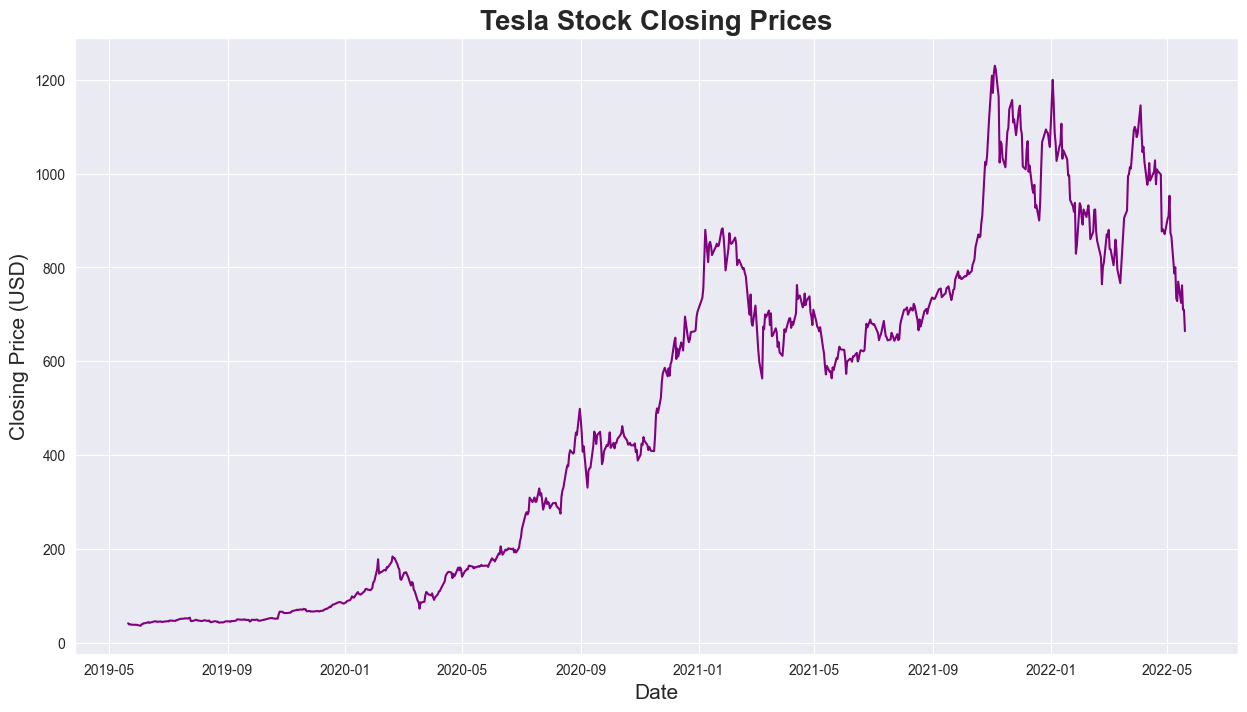

In [92]:
sns.set_style('darkgrid')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the 'Close' column
sns.lineplot(data=stock_data['Close'], color='purple')

# Set the title and labels
ax.set_title('Tesla Stock Closing Prices', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Closing Price (USD)', fontsize=15)

# Show the plot
plt.show()

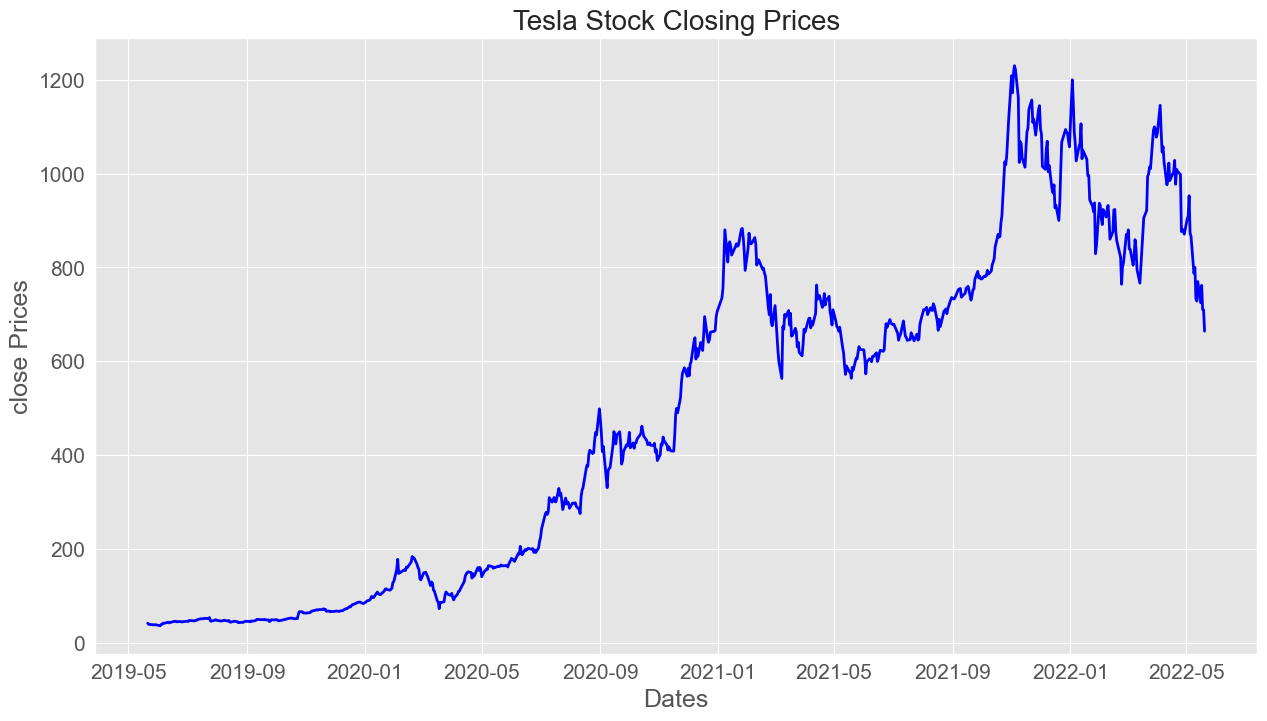

In [93]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.xlabel('Dates',fontsize=18)
plt.xticks(fontsize = 15)
plt.ylabel('close Prices',fontsize = 18)
plt.yticks(fontsize= 15)
plt.plot(stock_data['Close'],linewidth=2,color='b')
plt.title('Tesla Stock Closing Prices',fontsize = 20)
plt.show()


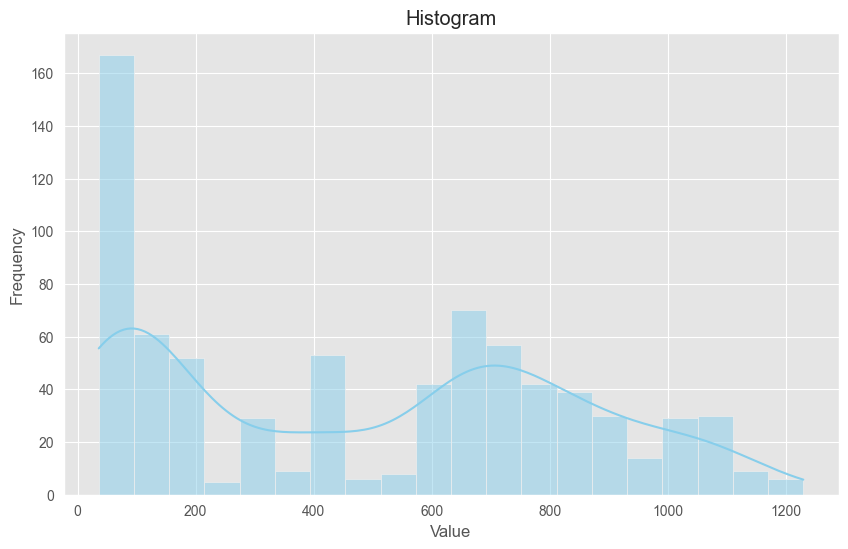

In [94]:


# Assuming data is your data
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Close'], bins=20, kde=True, color='skyblue')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [95]:
rolling_mean = stock_data['Close'].rolling(window=20).mean()
rolling_std = stock_data['Close'].rolling(window=20).std()


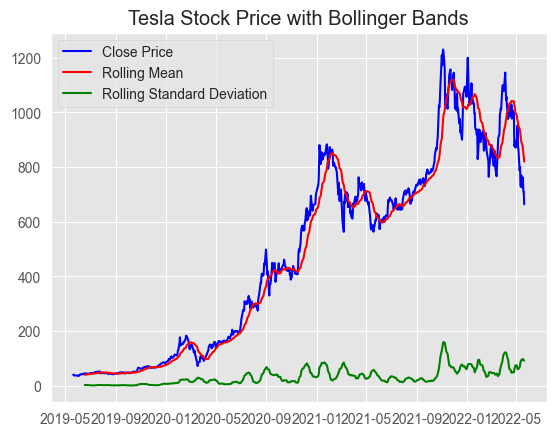

In [96]:

plt.plot(stock_data['Close'], label='Close Price',c='b')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Standard Deviation', color='green')
plt.legend()
plt.title('Tesla Stock Price with Bollinger Bands')
plt.show()

In [97]:
## ADF (Augmented Dickey-Fuller) Test for Stationarity
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])
adft

(-1.3630085817037496,
 0.5998762543050695,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [98]:
pd.Series(adft[0:4], index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])

ADF Test Statistic      -1.363009
P-Value                  0.599876
# Lags Used              9.000000
# Observations Used    748.000000
dtype: float64

In [114]:
# Test for stationary 
def test_stationary (timeseries):
    # Determing rolling statistics 
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(15, 8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Original',linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth=3)
    plt.plot(rolstd, color='green', label='Rolling Std',linewidth=3)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='black')
    plt.title('Rolling Mean & Standard Deviation',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print('Result of dickey fuller Test')
    adft= adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','P-Value','#Lags Used','Number of Observations Used'])
    for key,value in adft[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)

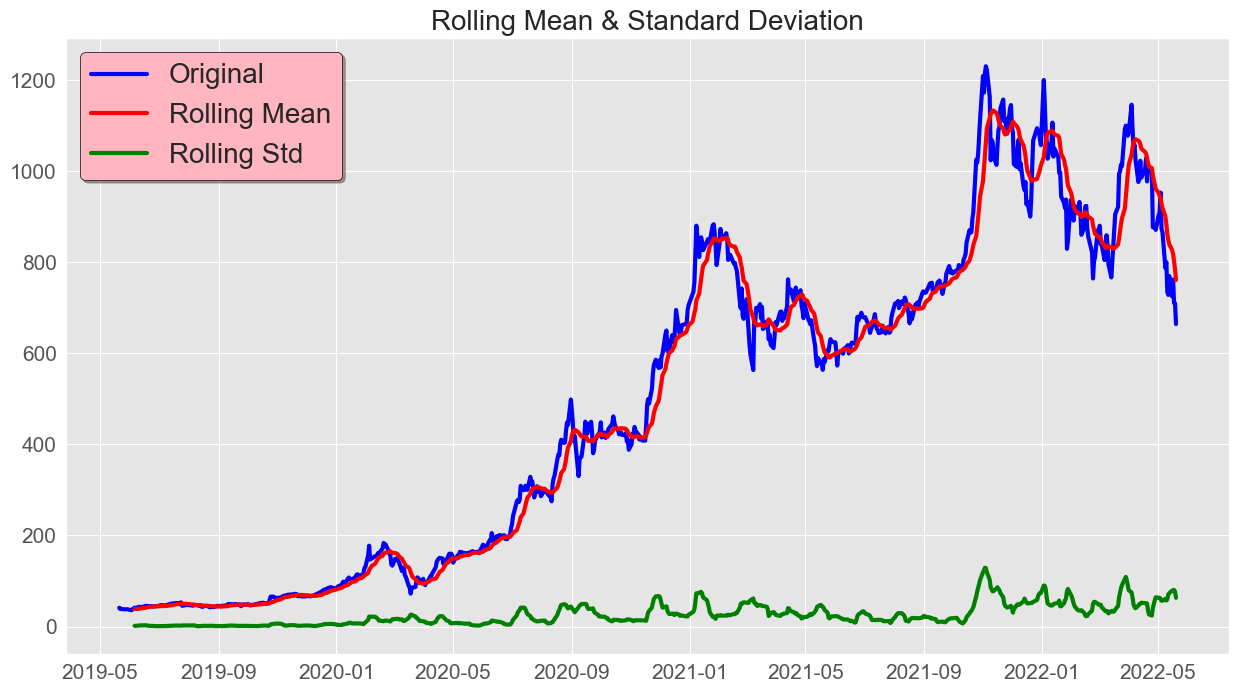

Result of dickey fuller Test
Test Statistics                 -1.363009
P-Value                          0.599876
#Lags Used                       9.000000
Number of Observations Used    748.000000
Critical Value (1%)             -3.439123
Critical Value (5%)             -2.865412
Critical Value (10%)            -2.568832
dtype: float64


In [115]:
test_stationary(stock_data['Close'])

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'],period=12)
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 1000x2000 with 0 Axes>

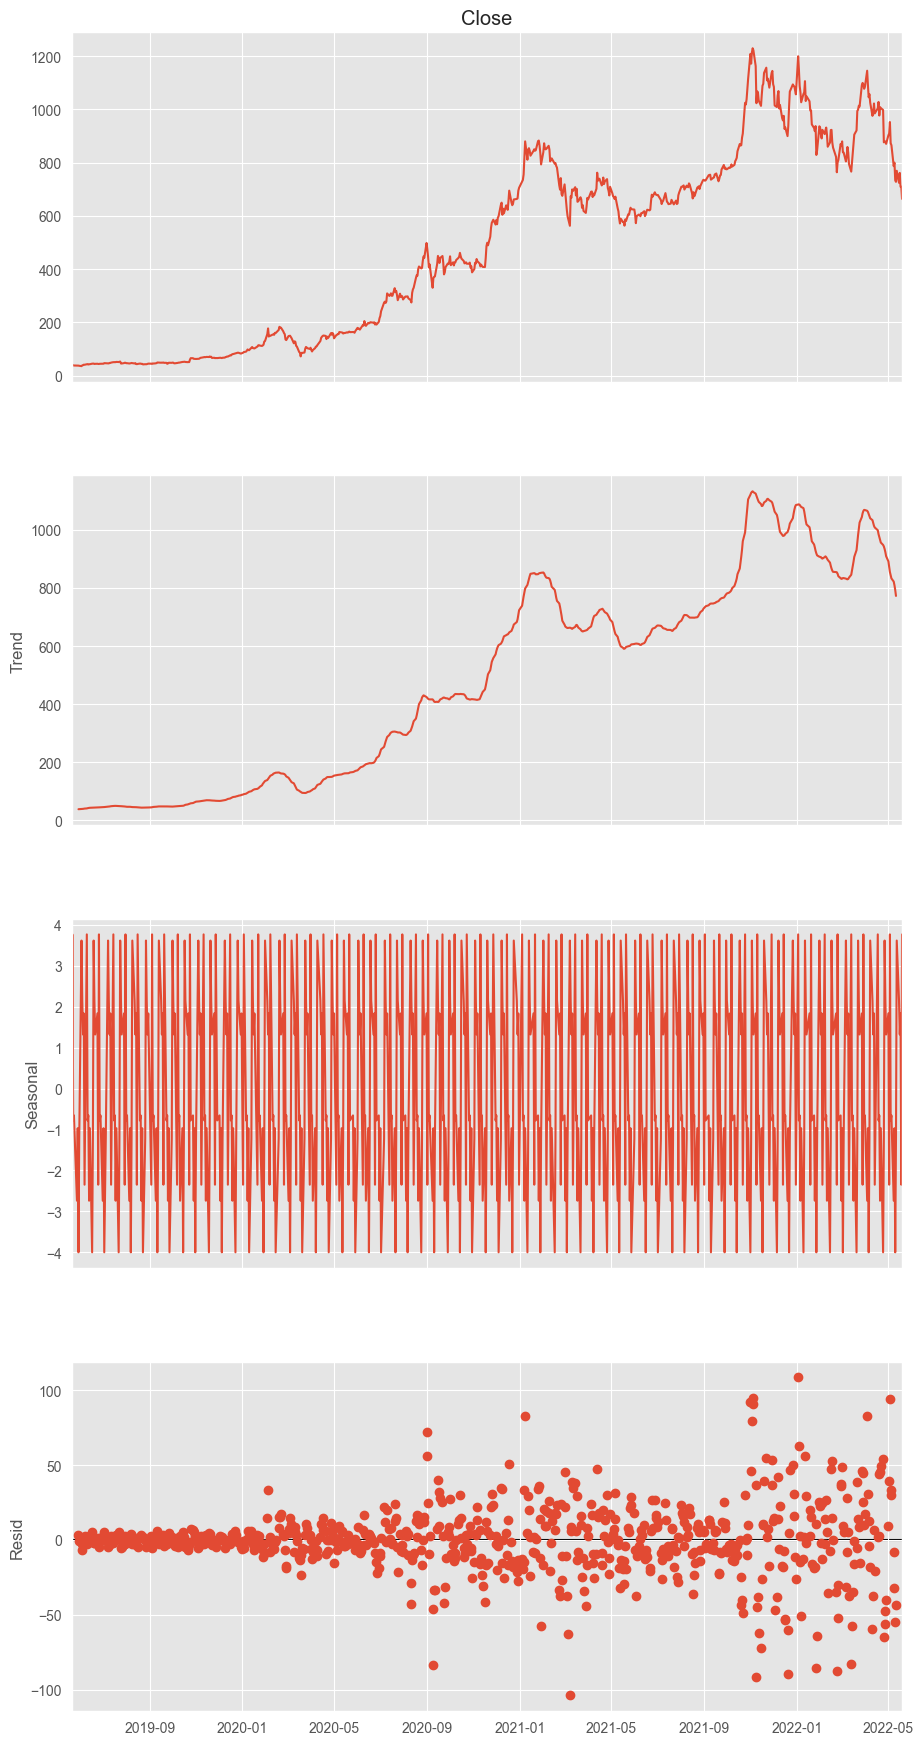

In [117]:
fig = plt.figure(figsize=(10,20))
fig = result.plot()
fig.set_size_inches(10,20)

In [118]:
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")

<Figure size 1000x2000 with 0 Axes>

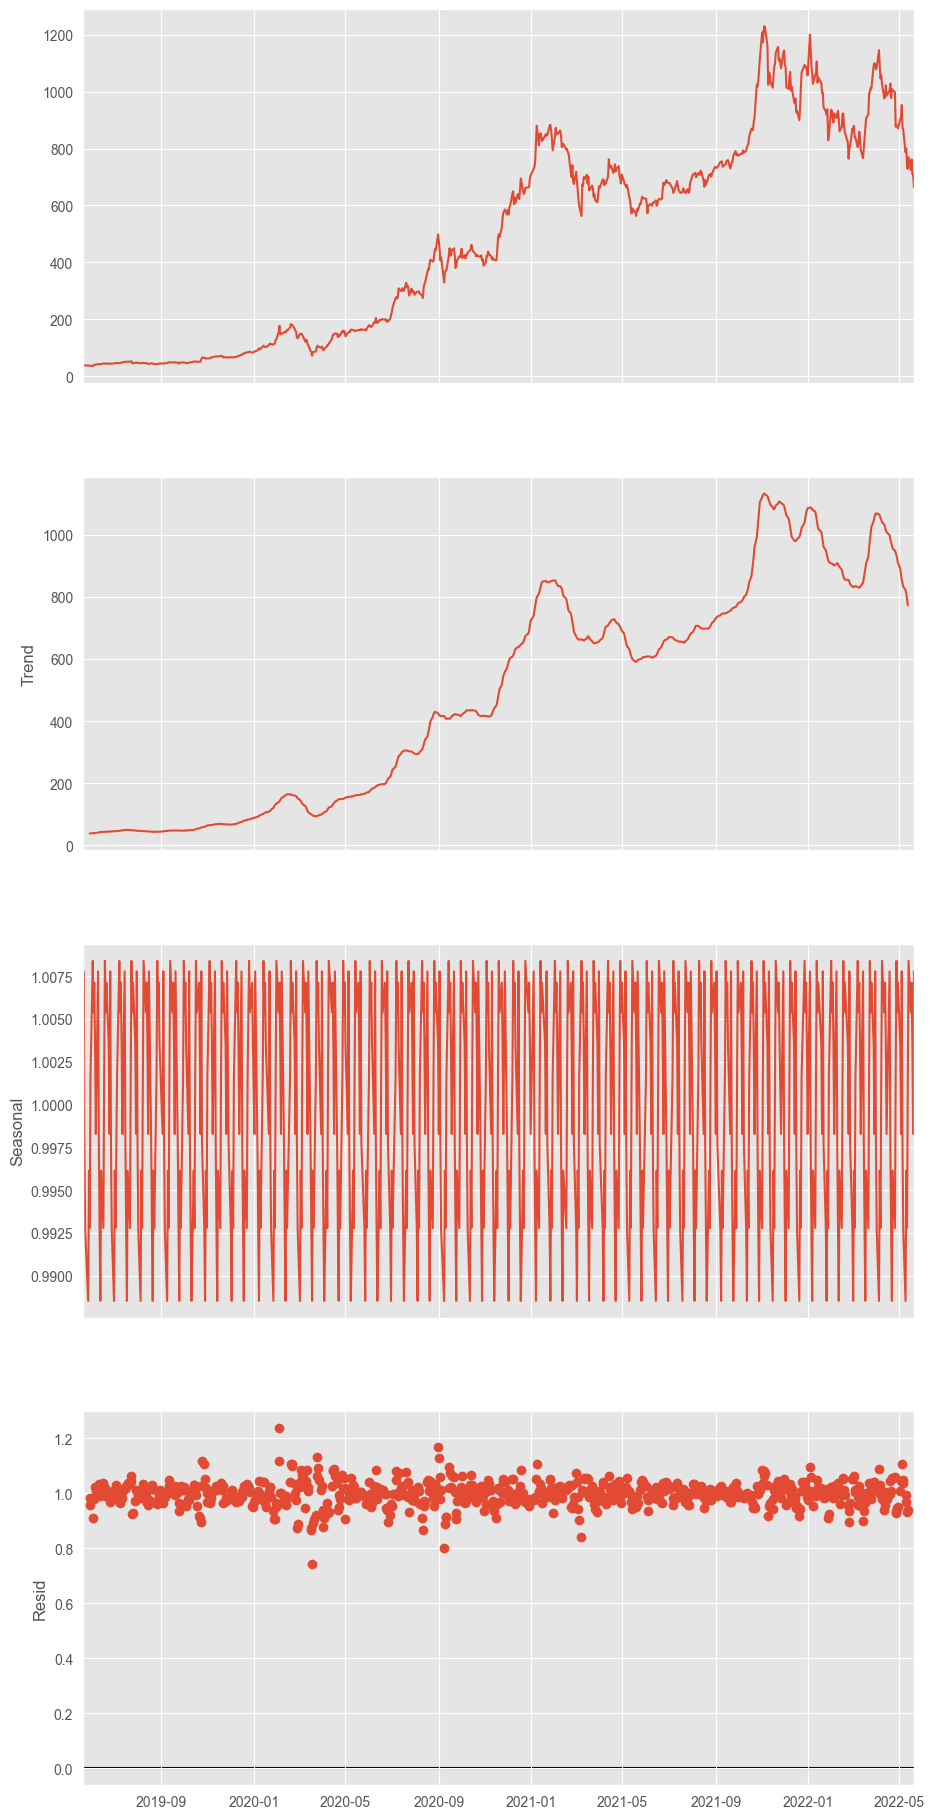

In [119]:
fig = plt.figure(figsize=(10,20))
fig = result.plot()
fig.set_size_inches(10,20)

<Axes: ylabel='Close'>

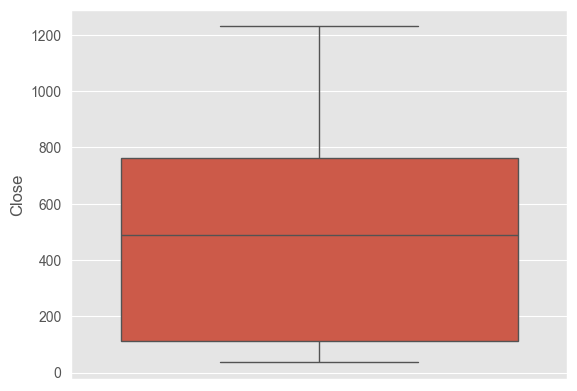

In [120]:
import seaborn as sns
sns.boxplot(stock_data.Close)

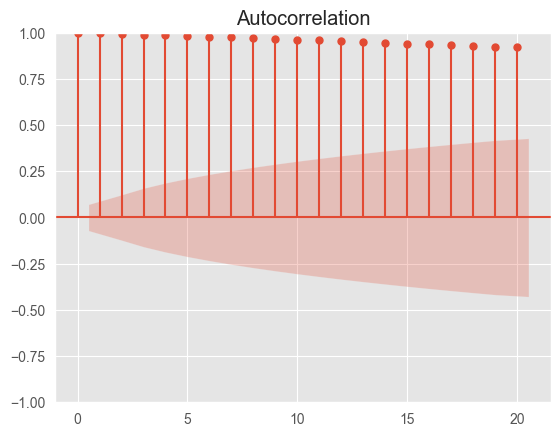

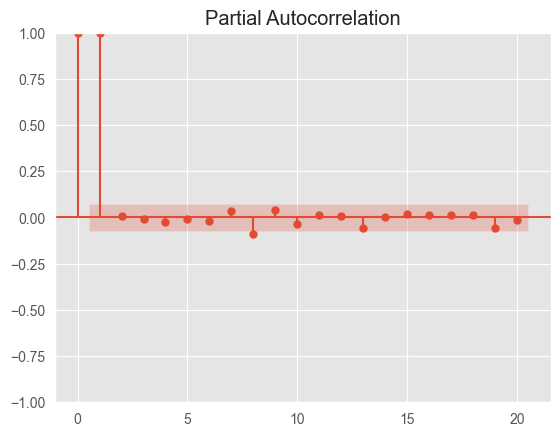

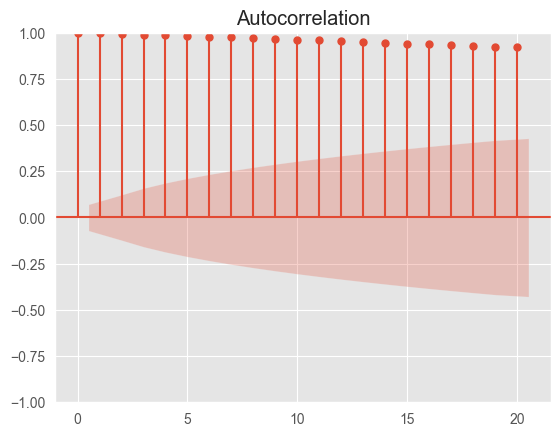

In [121]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(stock_data['Close'],lags=20)
plot_acf(stock_data['Close'],lags=20)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import sys

In [ ]:
df = pd.read_csv('./TSLA.CSV')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [ ]:
stock_data = df[['Date', 'Close']]

In [ ]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [ ]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [ ]:
stock_data.set_index('Date', inplace=True)

# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [ ]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


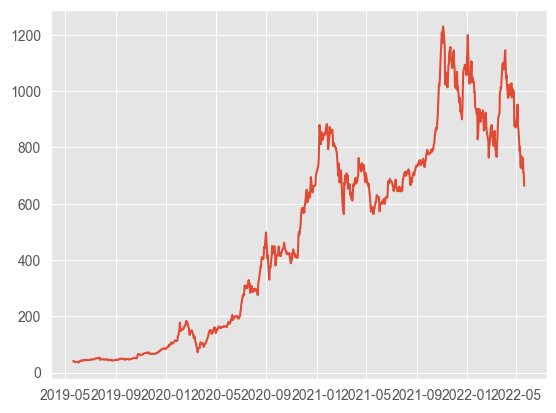

In [ ]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

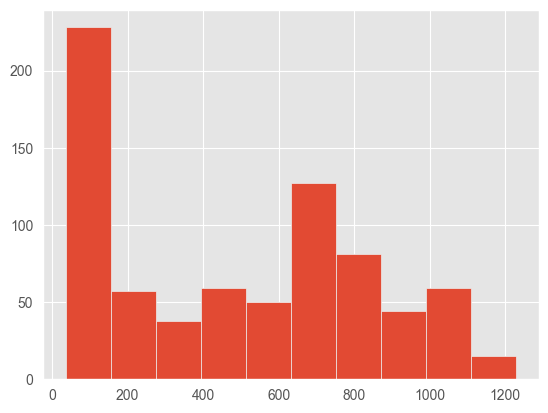

In [ ]:
plt.hist(stock_data['Close'])

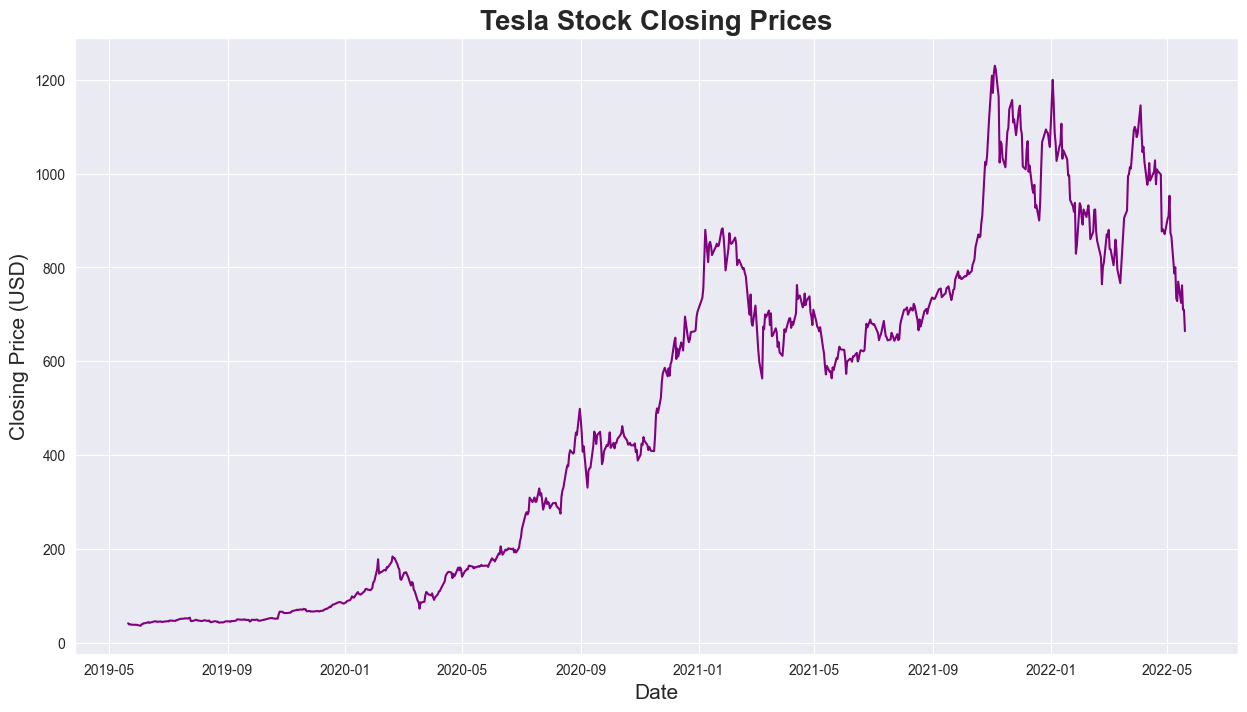

In [ ]:
sns.set_style('darkgrid')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the 'Close' column
sns.lineplot(data=stock_data['Close'], color='purple')

# Set the title and labels
ax.set_title('Tesla Stock Closing Prices', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Closing Price (USD)', fontsize=15)

# Show the plot
plt.show()

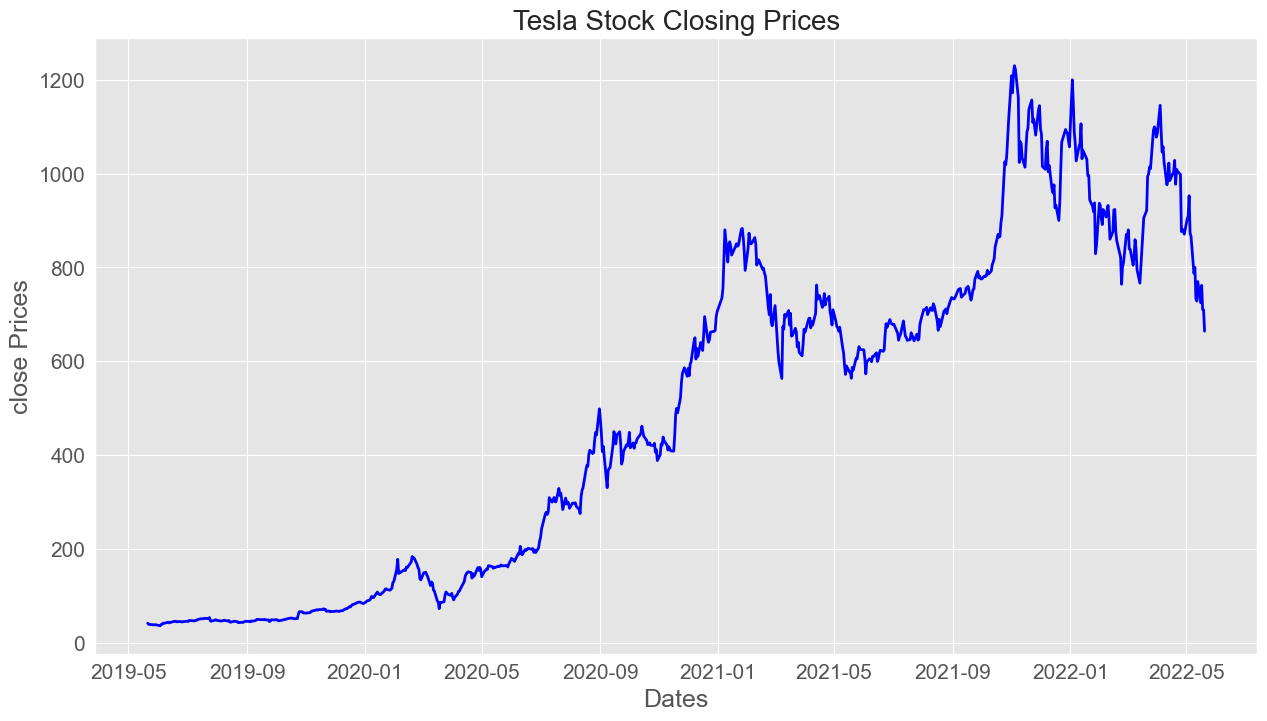

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.xlabel('Dates',fontsize=18)
plt.xticks(fontsize = 15)
plt.ylabel('close Prices',fontsize = 18)
plt.yticks(fontsize= 15)
plt.plot(stock_data['Close'],linewidth=2,color='b')
plt.title('Tesla Stock Closing Prices',fontsize = 20)
plt.show()


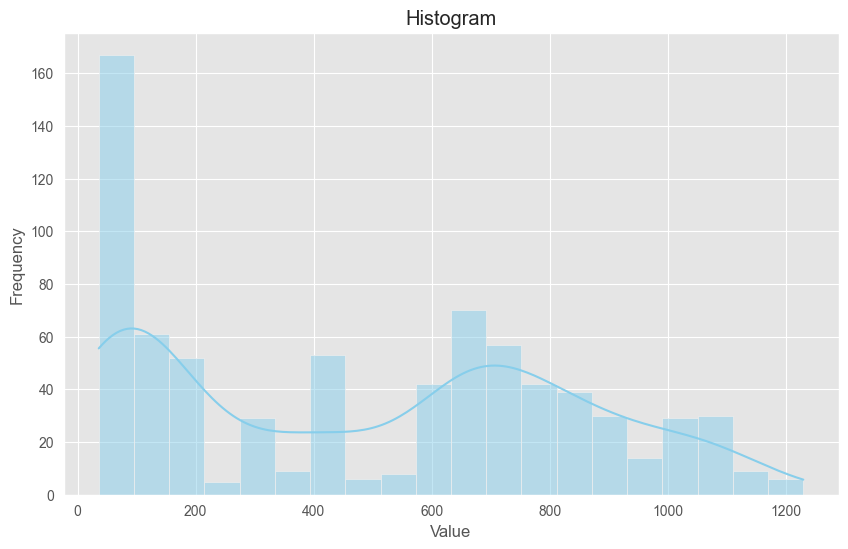

In [ ]:


# Assuming data is your data
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Close'], bins=20, kde=True, color='skyblue')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
rolling_mean = stock_data['Close'].rolling(window=20).mean()
rolling_std = stock_data['Close'].rolling(window=20).std()


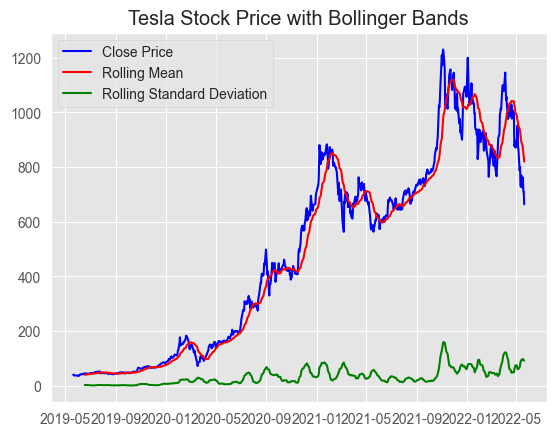

In [ ]:

plt.plot(stock_data['Close'], label='Close Price',c='b')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Standard Deviation', color='green')
plt.legend()
plt.title('Tesla Stock Price with Bollinger Bands')
plt.show()

In [ ]:
## ADF (Augmented Dickey-Fuller) Test for Stationarity
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])
adft

(-1.3630085817037496,
 0.5998762543050695,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [ ]:
pd.Series(adft[0:4], index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])

ADF Test Statistic      -1.363009
P-Value                  0.599876
# Lags Used              9.000000
# Observations Used    748.000000
dtype: float64

In [ ]:
# Test for stationary 
def test_stationary (timeseries):
    # Determing rolling statistics 
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(15, 8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Original',linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth=3)
    plt.plot(rolstd, color='green', label='Rolling Std',linewidth=3)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='black')
    plt.title('Rolling Mean & Standard Deviation',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print('Result of dickey fuller Test')
    adft= adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','P-Value','#Lags Used','Number of Observations Used'])
    for key,value in adft[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)

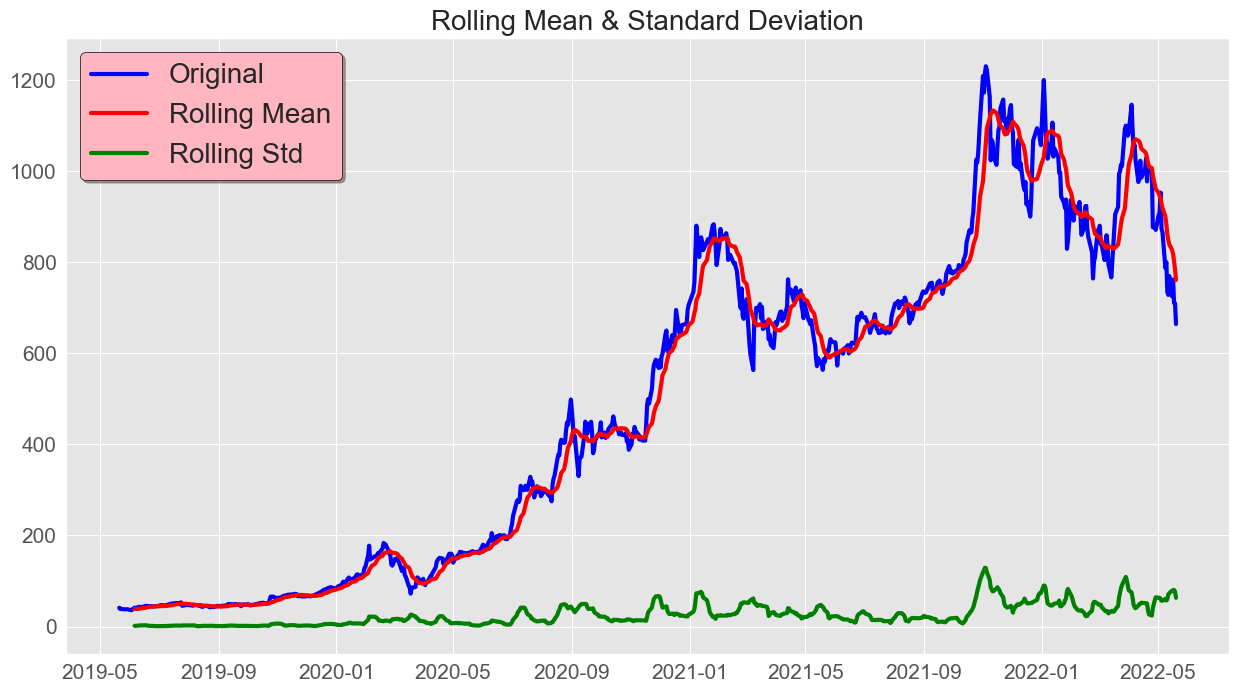

Result of dickey fuller Test
Test Statistics                 -1.363009
P-Value                          0.599876
#Lags Used                       9.000000
Number of Observations Used    748.000000
Critical Value (1%)             -3.439123
Critical Value (5%)             -2.865412
Critical Value (10%)            -2.568832
dtype: float64


In [ ]:
test_stationary(stock_data['Close'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'],period=12)
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 1000x2000 with 0 Axes>

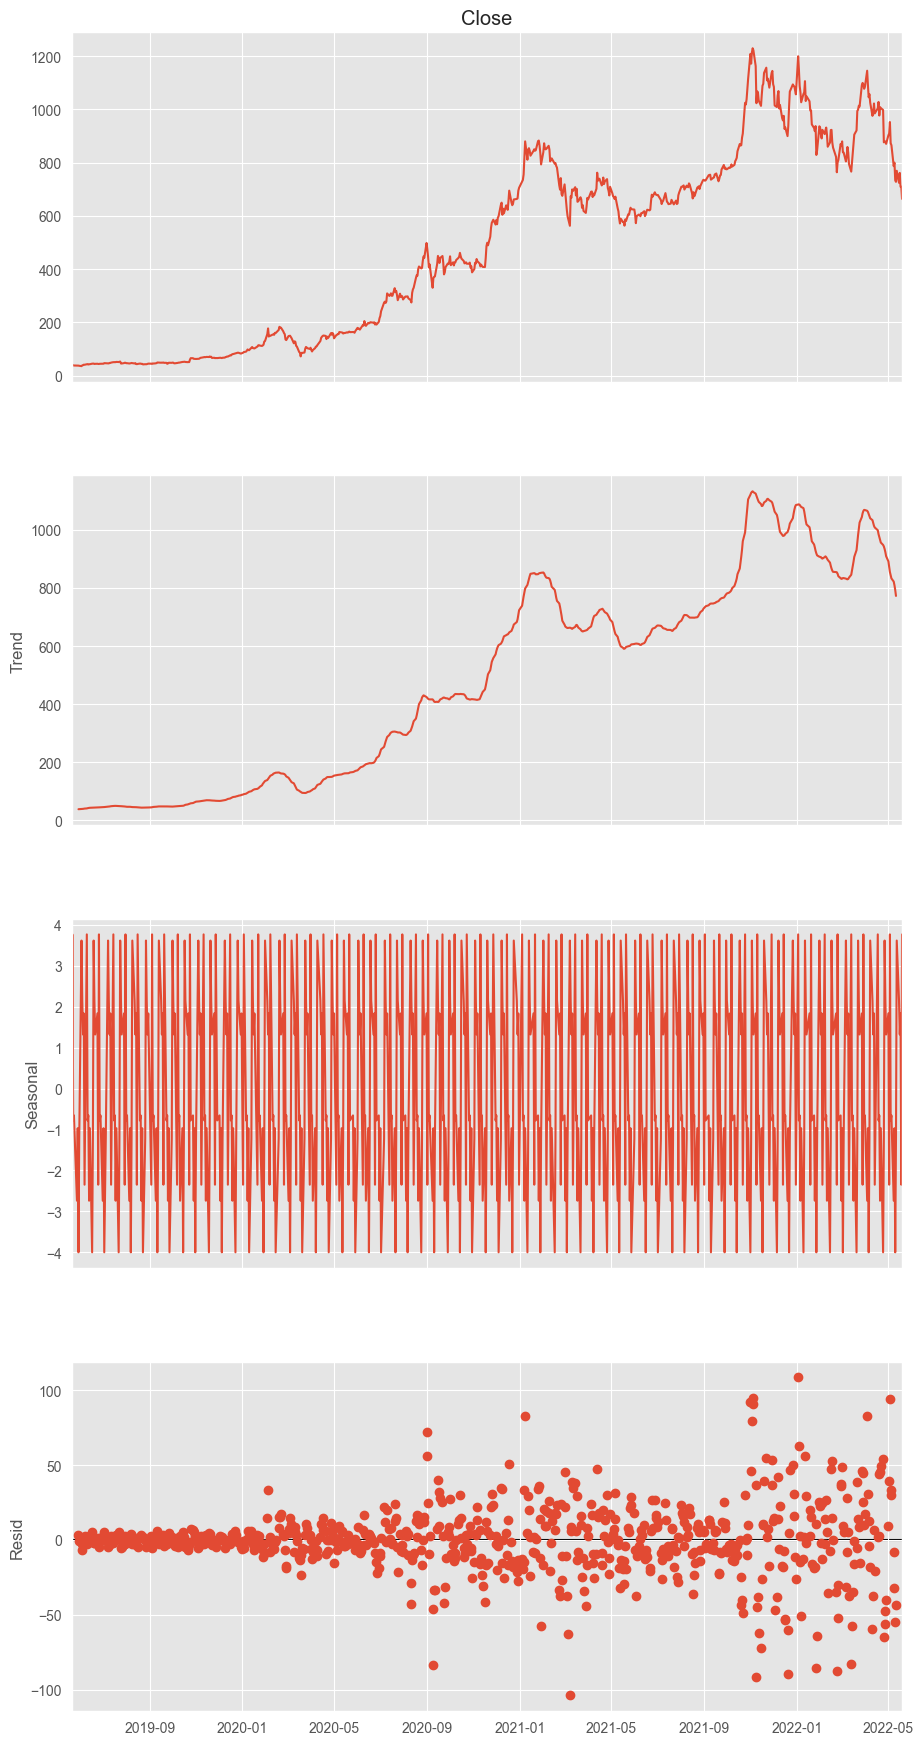

In [ ]:
fig = plt.figure(figsize=(10,20))
fig = result.plot()
fig.set_size_inches(10,20)

In [ ]:
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")

<Figure size 1000x2000 with 0 Axes>

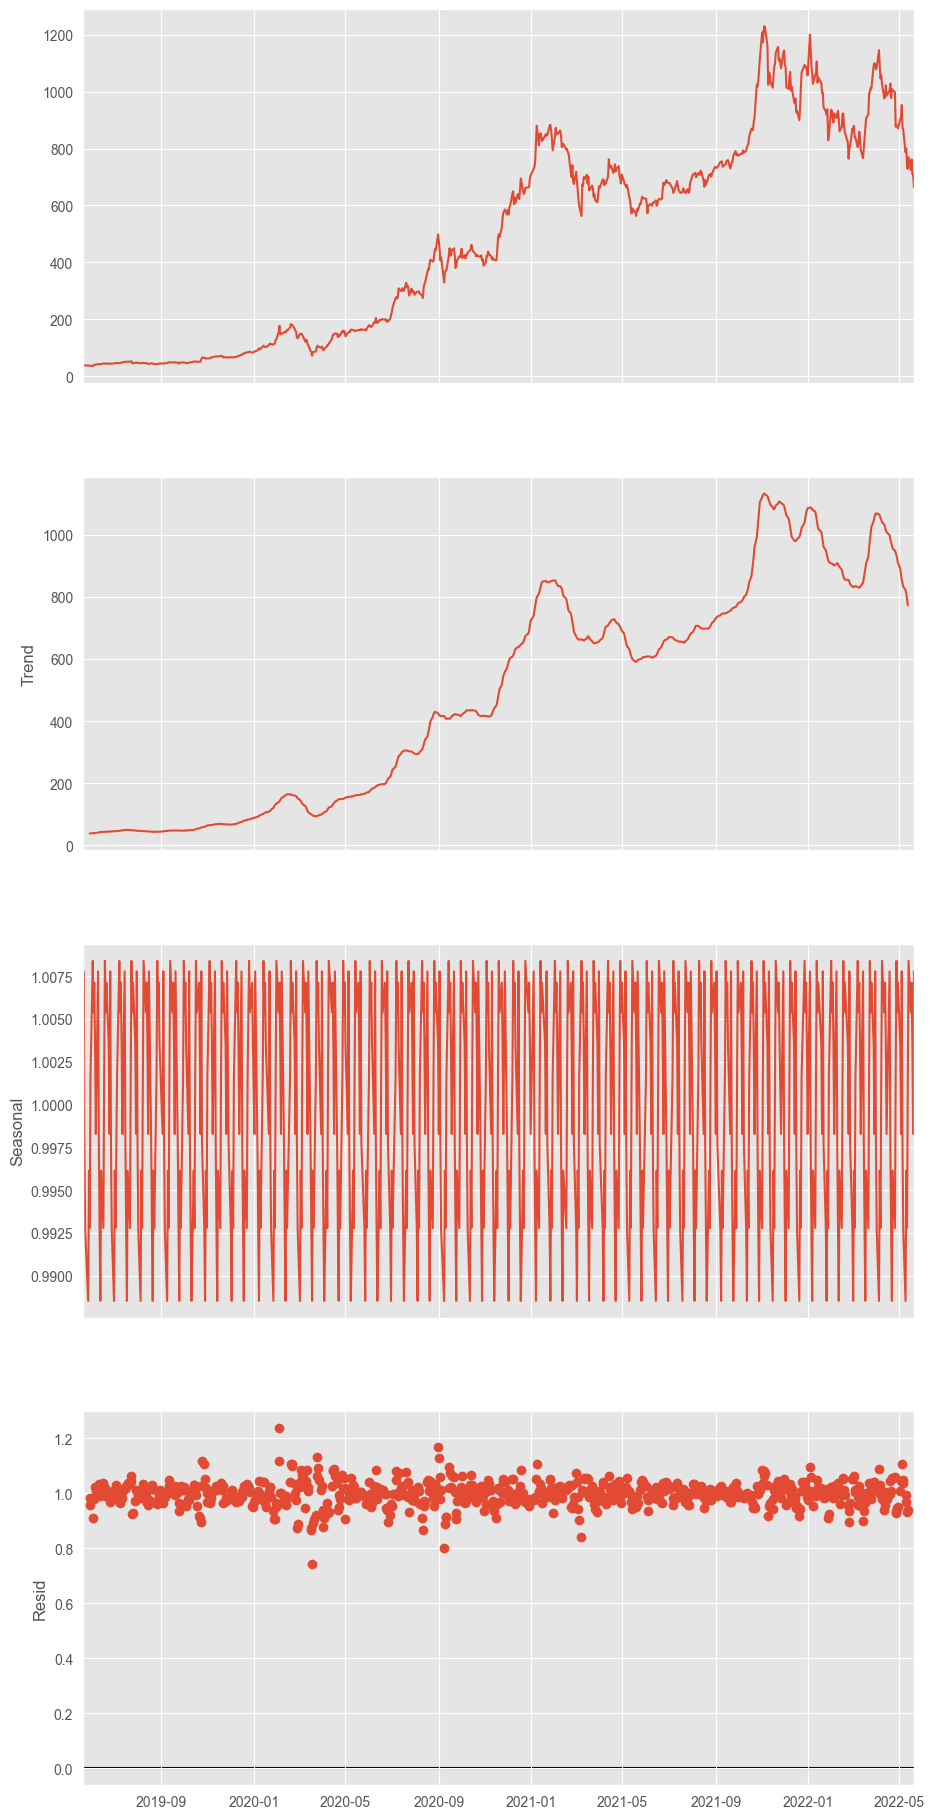

In [ ]:
fig = plt.figure(figsize=(10,20))
fig = result.plot()
fig.set_size_inches(10,20)

<Axes: ylabel='Close'>

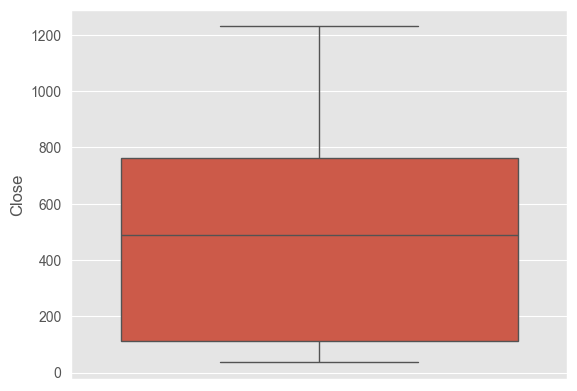

In [ ]:
import seaborn as sns
sns.boxplot(stock_data.Close)

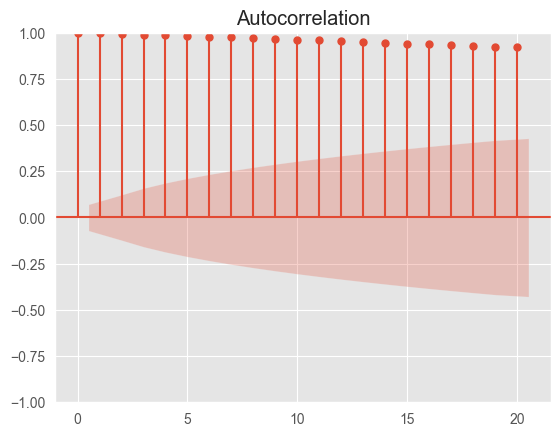

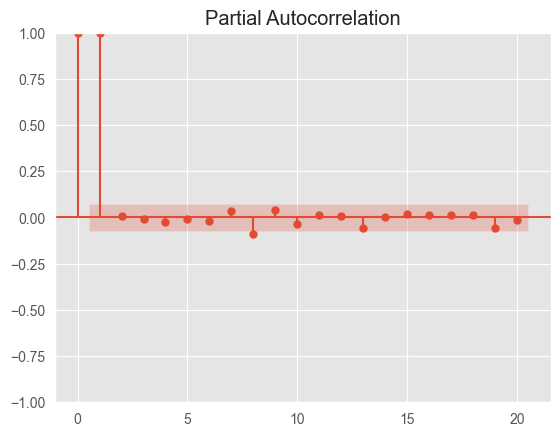

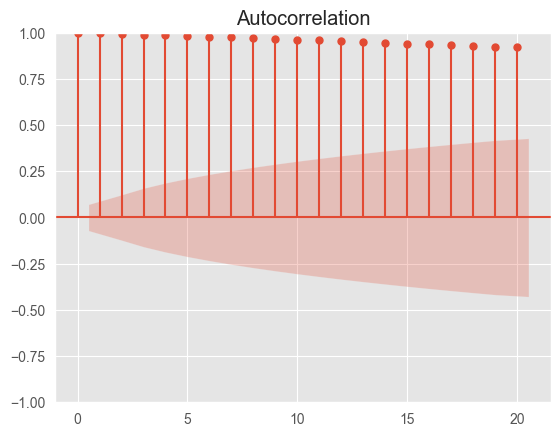

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(stock_data['Close'],lags=20)
plot_acf(stock_data['Close'],lags=20)


Preprocessing the data
- Handle missing values
- Handle outliers
- convert the data into stationary
- Normalize the data
- Split the data into training and testing sets

In [ ]:
df_close = stock_data['Close']

In [ ]:
df_close=df_close.diff()
df_close = df_close.dropna()

In [ ]:
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

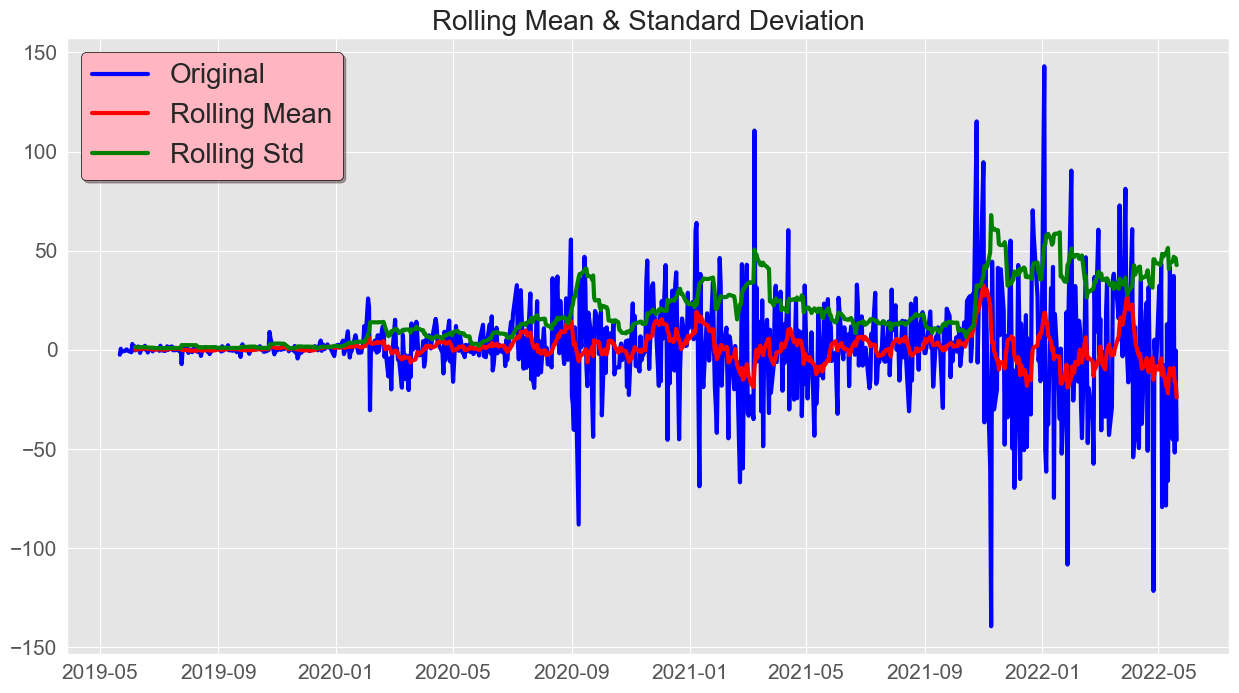

Result of dickey fuller Test
Test Statistics               -8.324564e+00
P-Value                        3.498786e-13
#Lags Used                     8.000000e+00
Number of Observations Used    7.480000e+02
Critical Value (1%)           -3.439123e+00
Critical Value (5%)           -2.865412e+00
Critical Value (10%)          -2.568832e+00
dtype: float64


In [ ]:
test_stationary(df_close)

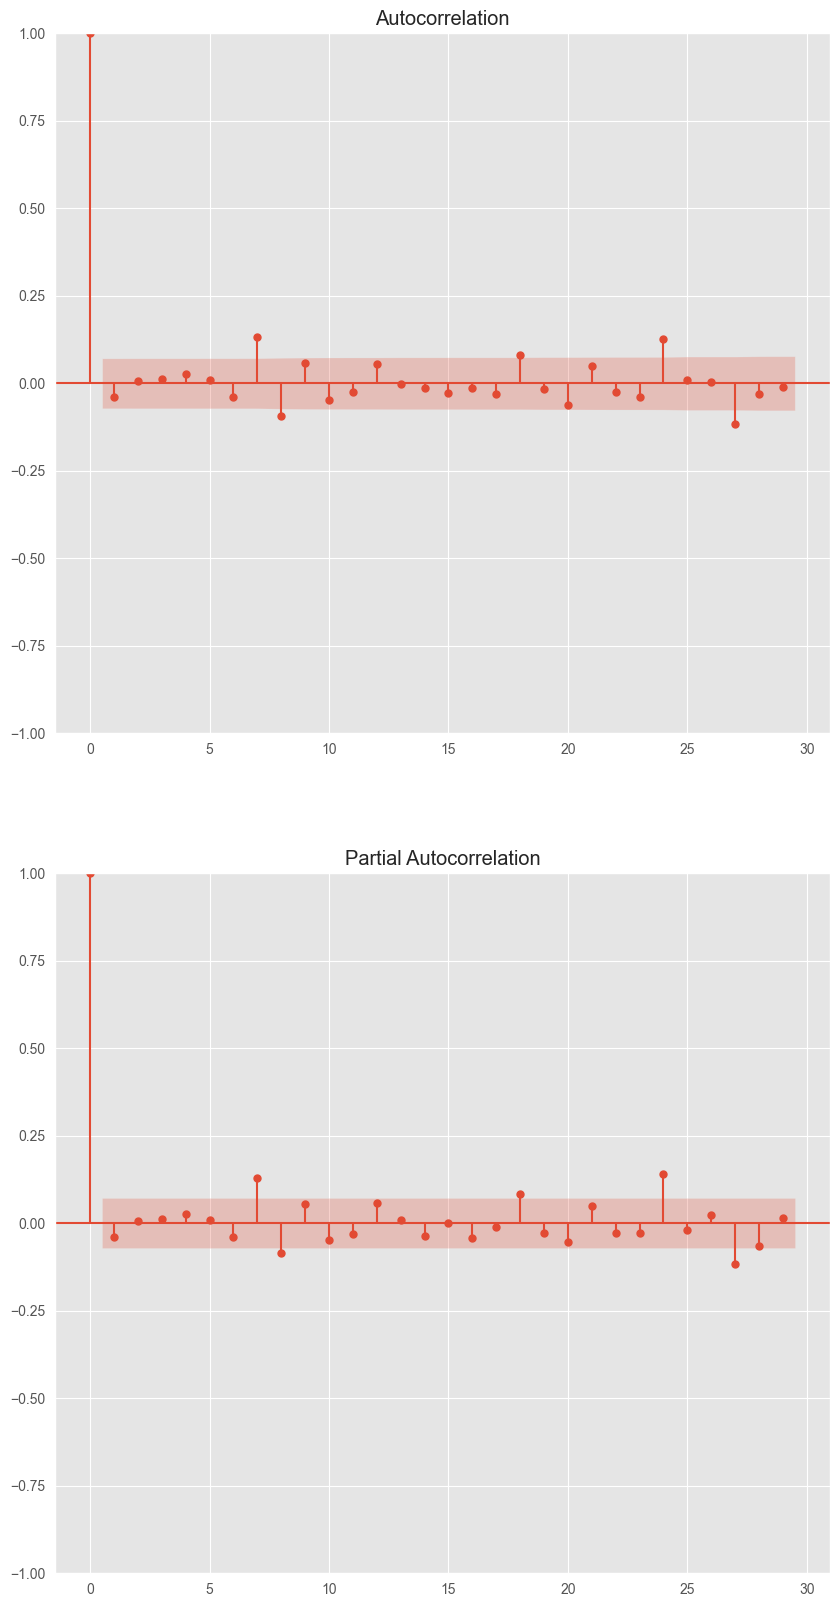

In [ ]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_close,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_close,ax=ax2)

Preprocessing the data
- Handle missing values
- Handle outliers
- convert the data into stationary
- Normalize the data
- Split the data into training and testing sets

In [122]:
df_close = stock_data['Close']

In [123]:
df_close=df_close.diff()
df_close = df_close.dropna()

In [124]:
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

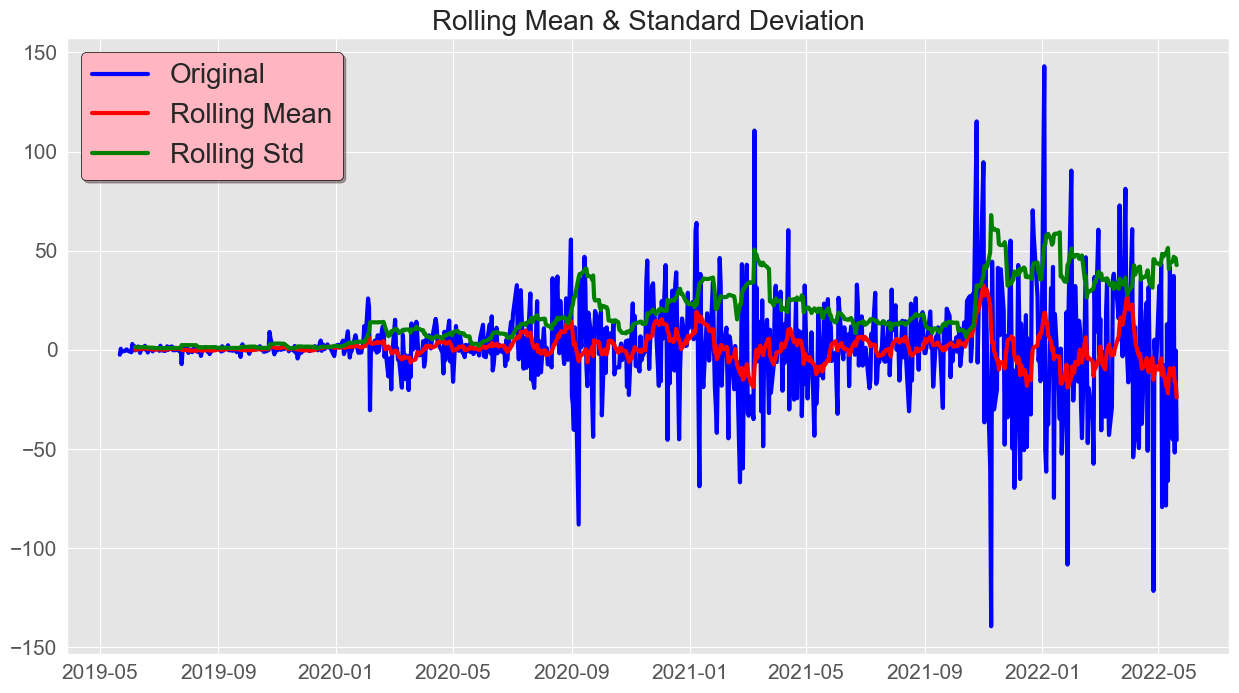

Result of dickey fuller Test
Test Statistics               -8.324564e+00
P-Value                        3.498786e-13
#Lags Used                     8.000000e+00
Number of Observations Used    7.480000e+02
Critical Value (1%)           -3.439123e+00
Critical Value (5%)           -2.865412e+00
Critical Value (10%)          -2.568832e+00
dtype: float64


In [125]:
test_stationary(df_close)

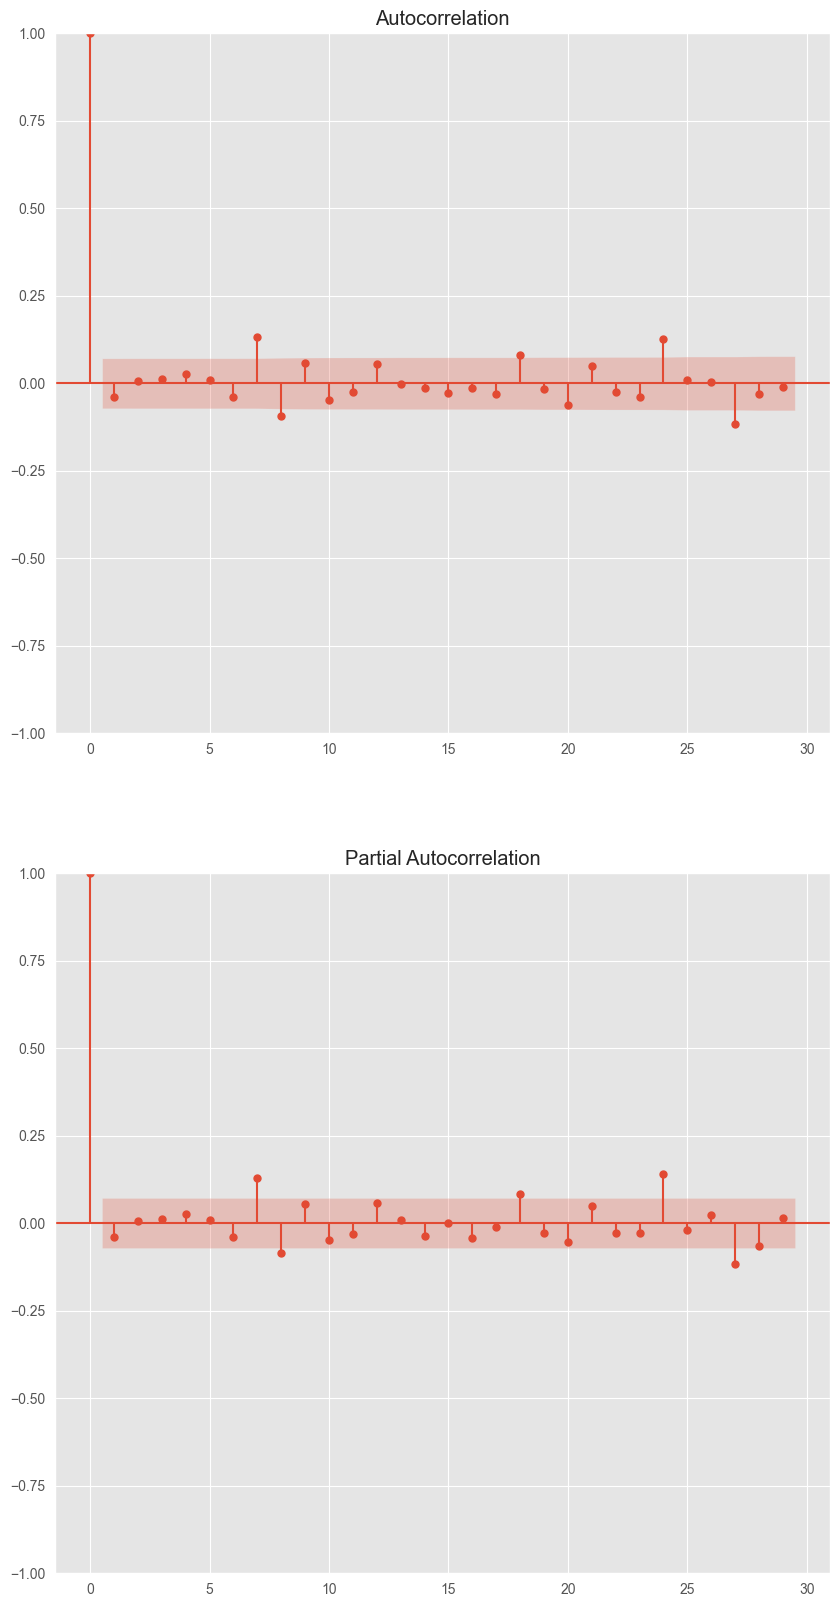

In [126]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_close,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_close,ax=ax2)